In [1]:
%matplotlib inline

## Experiments

### 1. Split the whole dataset into train/val.

180 `beatles` songs, 20 `queen`, 18 `zweieck` and 62 `robbie_williams` songs.

```
     label     ratio
G     2380  0.093289
A     2182  0.085528
D     2126  0.083333
C     1849  0.072476
E     1351  0.052955
F     1164  0.045626
A#     864  0.033866
Am     727  0.028496
Em     711  0.027869
B      695  0.027242
N      662  0.025949
D#     607  0.023793
Dm     525  0.020579
G#     524  0.020539
Bm     462  0.018109
C#     385  0.015091
F#m    364  0.014268
F#     362  0.014189
Cm     328  0.012857
Fm     302  0.011838
Gm     272  0.010662
C#m    210  0.008231
G#m    161  0.006311
A#m     97  0.003802
D#m     70  0.002744
```
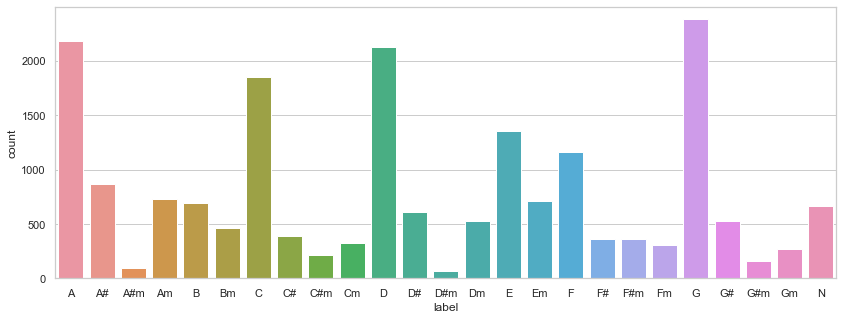

**Result: high accuracy and high overfitting on first 5 chords**

### 2. Resample dataset manually using annotations. Naive sampling that does not considering frames but only annotations per audio.


In [ ]:
from chord_recognition.dataset import prepare_datasource

excluded_files = (
    '11-Man Machine',
    '01-Ghosts',
    '11-A Place To Crash',
    '08-Heaven From Here',
    '09-Random Acts Of Kindness',
    '05-South Of The Border',
)
robbie_ds = [ann for ann, _ in prepare_datasource(('robbie_williams',), excluded_files=excluded_files)]

excluded_files=(
    # zweieck
    '09_-_Mr_Morgan',
    '01_-_Spiel_Mir_Eine_Alte_Melodie',
    '11_-_Ich_Kann_Heute_Nicht',
    # queen
    '14 Hammer To Fall',
    '08 Save Me',
)
isophonics_ds = [ann for ann, _ in prepare_datasource(('zweieck', 'queen'), excluded_files=excluded_files)]
allowed_files = (
    '06-Mr_Moonlight',
    '06-Yellow_Submarine',
    '03-I_m_Only_Sleeping',
    '09-Penny_Lane',
    '12-Wait',
    '11-Do_You_Want_To_Know_A_Secret',
    '12-A_Taste_Of_Honey',
    '04-I_m_Happy_Just_To_Dance_With_You',
    '03-If_I_Fell',
    '10-I_m_Looking_Through_You',
    '09-When_I_m_Sixty-Four',
    '06-Till_There_Was_You',
    '05-Octopus_s_Garden',
    '03-All_My_Loving',
    '05-And_I_Love_Her',
    '02-All_I_ve_Got_To_Do',
    '10-For_No_One',
    '08-Because',
    '06-She_s_Leaving_Home',
    '04-Chains',
    '10-Things_We_Said_Today',
    '09-One_After_909',
    '09-Girl',
    '14-Run_For_Your_Life',
    '04-Oh_Darling',
    '04-Don_t_Bother_Me',
    '06-I_Want_You_She_s_So_Heavy_',
    '06-Tell_Me_Why',
)
beatles_ds = [ann for ann, _ in prepare_datasource(('beatles',), allowed_files=allowed_files)]
isophonics_df = pd.concat([isophonics_df, beatles_df])

```
     label     ratio
G      771  0.063488
C      677  0.055748
A      669  0.055089
F      647  0.053277
D      606  0.049901
A#     568  0.046772
D#     476  0.039196
E      462  0.038043
Em     426  0.035079
G#     410  0.033762
Am     401  0.033020
B      379  0.031209
Dm     354  0.029150
C#     338  0.027833
Cm     294  0.024209
N      294  0.024209
F#     278  0.022892
Bm     249  0.020504
Fm     242  0.019928
F#m    205  0.016881
Gm     198  0.016304
C#m    151  0.012434
G#m    144  0.011858
A#m     81  0.006670
D#m     70  0.005764
```

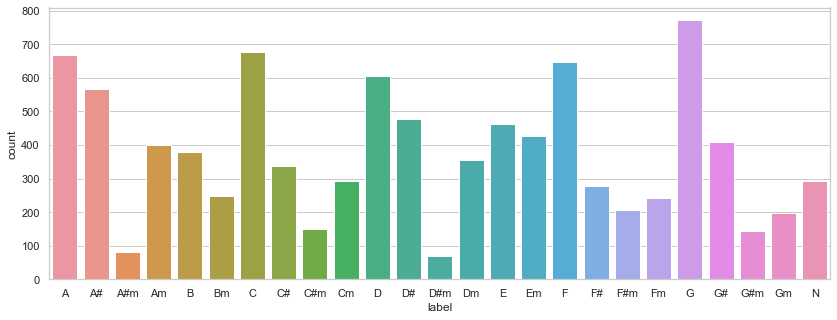

**Result**: Accuracy even better on val dataset ~96%. Confusion matrix also shows not bad result. However, WCSR (majmin in mir_eval) metrics works poor on beatles dataset:

    robbie_williams: 0.909
    queen: 0.804
    zweieck: 0.842
    beatles: 0.480

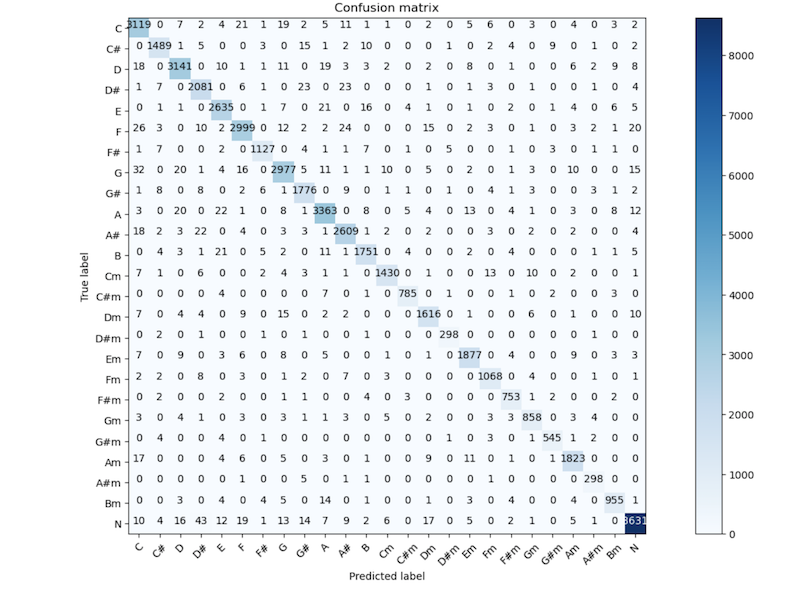

### 3. Random undersampling the majority classes on `beatles` and `robbie_williams` datasets

The amount of labels on `beatles` dataset
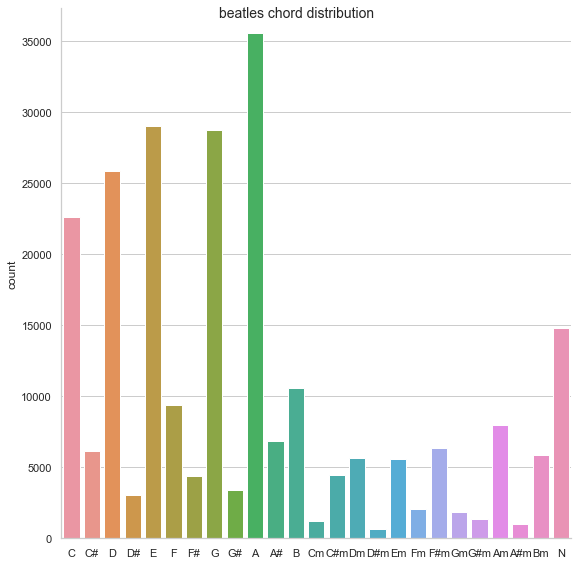

`robbie_williams` labels distribution
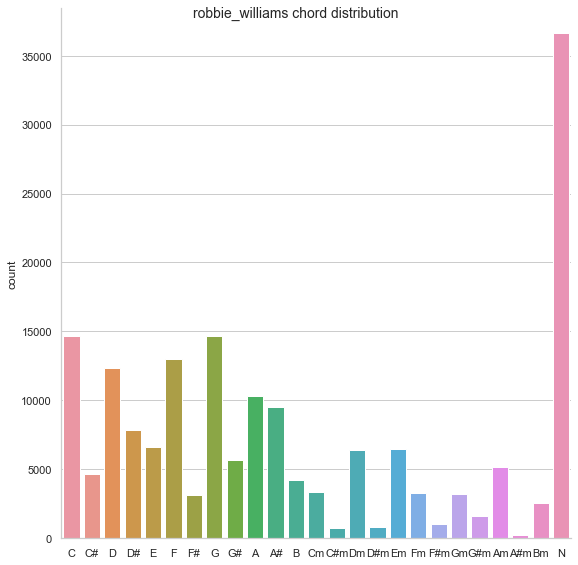

`zweieck`
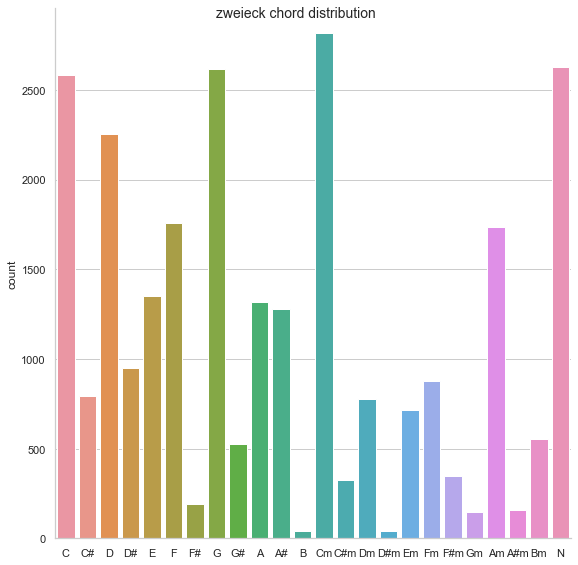

`queen`
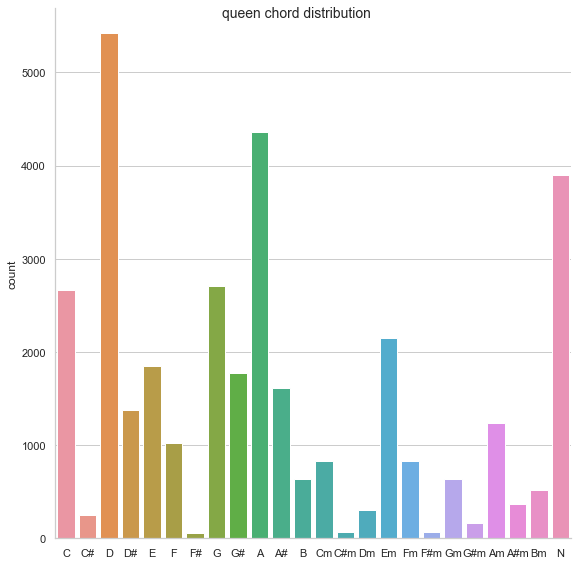

#### Undersampling `beatles` dataset randomly removing samples from majority of classes

```python
sampling_strategy = {
    0: 8000,
    2: 8000,
    4: 8000,
    5: 8000,
    7: 8000,
    9: 8000,
    11: 8000,
    24: 8000,
}
```

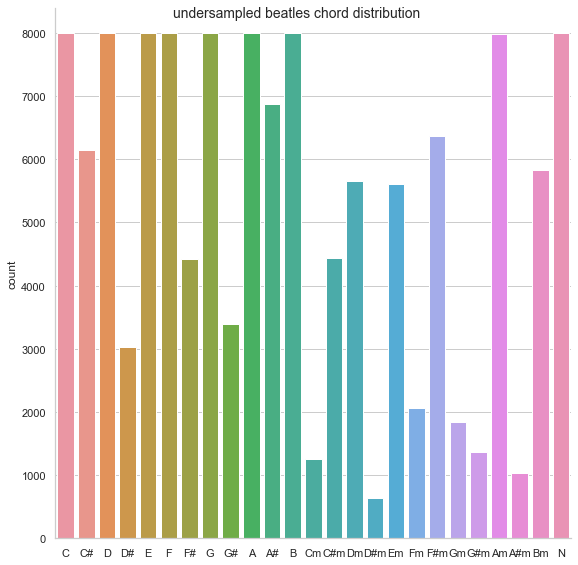

#### Undersampling `robbie_williams` dataset randomly removing samples from majority of classes

```python
sampling_strategy = {
    0: 8000,
    2: 8000,
    5: 8000,
    7: 8000,
    9: 8000,
    24: 5000,
}
```

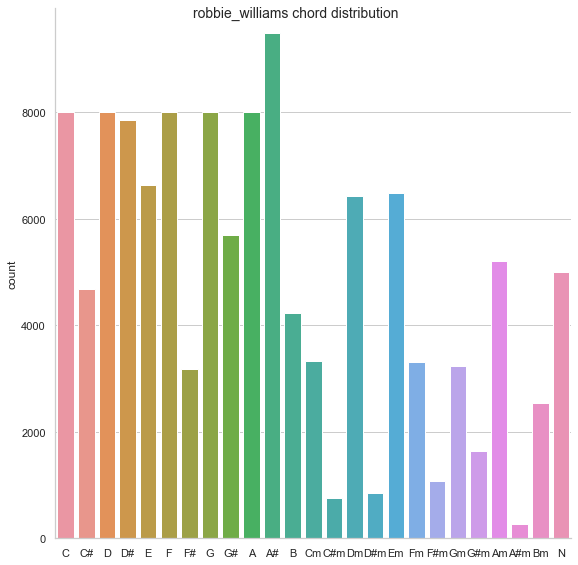

#### Concat undersampled datasets plus  `queen` and `zweick`.  The final distribution has the following structure
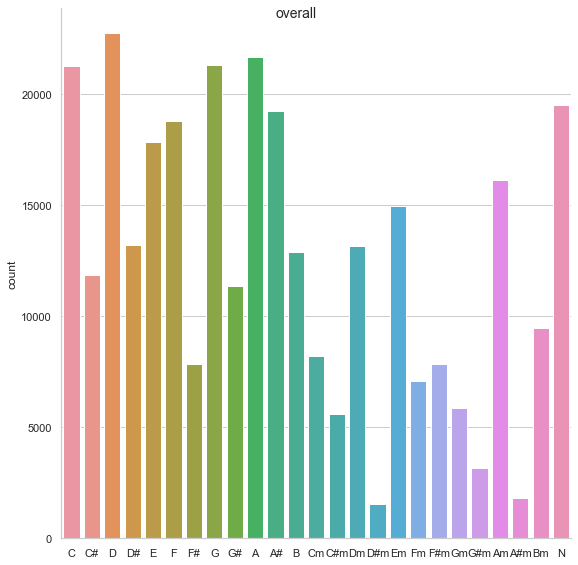

**Result**: beatles: 0.776, queen: 0.803, zweieck: 0.834, robbie_williams: 0.901
It seems that I removed some features when I was undersampling the beatles dataset

loss:
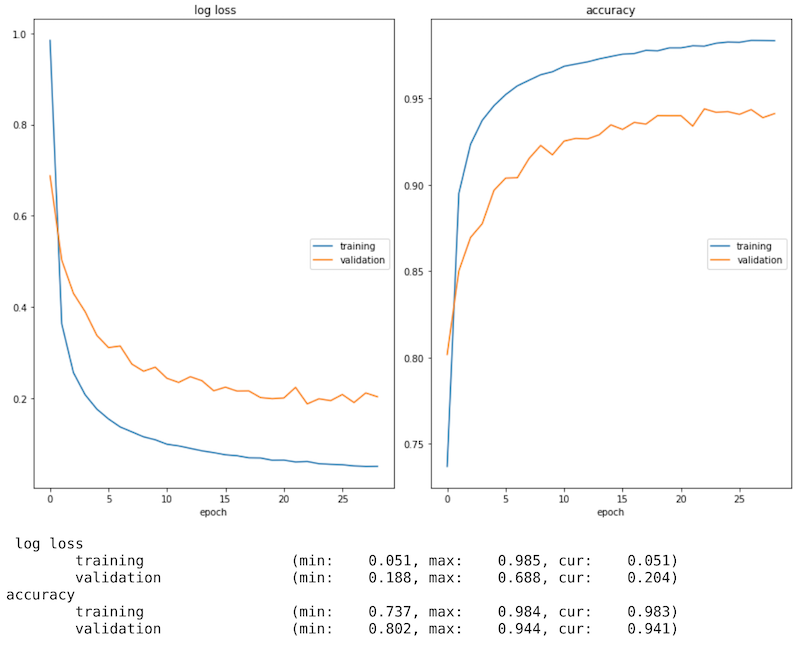




confusion matrix on validated data
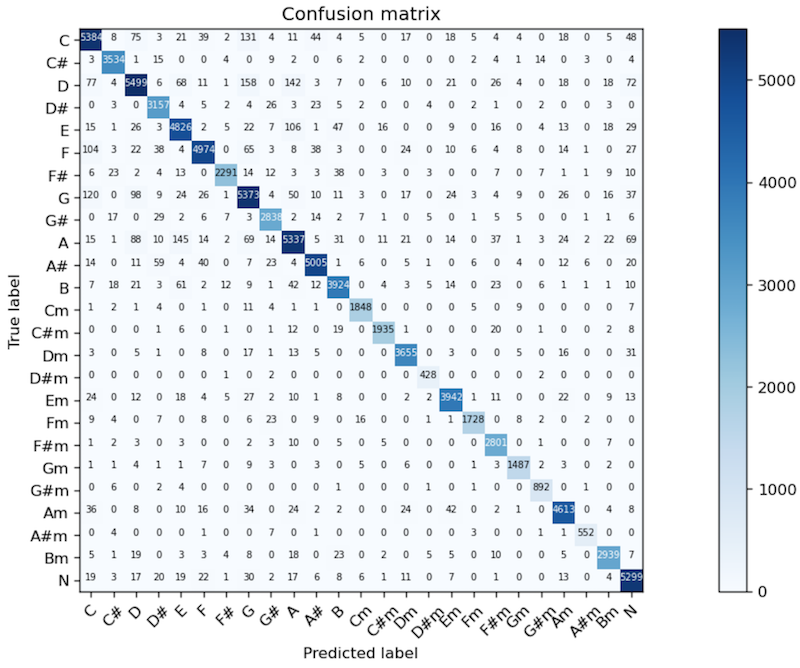

### 4. Same as #3 but using L2 regularization

Here is a stats of model weights w/o regularization

| layer  | mean | std | min | max |
| --- | --- | --- | --- | --- |
| [32, 1, 3, 3] | 0.01195588 | 0.23041508 | -0.44311804 | 0.4832016 |
| [32] | 1.000668 | 0.13506913 | 0.7528172 | 1.2881731 |
| [32] | 0.016741447 | 0.11628908 | -0.22354493 | 0.34997138 |
| [32, 32, 3, 3] | -0.00842397 | 0.121347636 | -0.43391904 | 0.4086566 |
| [32] | 1.0101022 | 0.05380383 | 0.9211984 | 1.1595175 |
| [32] | 0.015937982 | 0.09074649 | -0.14982596 | 0.1793945 |
| [64, 32, 3, 3] | -0.014991228 | 0.12530607 | -0.5356139 | 0.4391299 |
| [64] | 0.99884516 | 0.07463706 | 0.8075169 | 1.2038639 |
| [64] | 0.15452284 | 0.12747581 | -0.17548582 | 0.415933 |
| [64, 64, 3, 3] | -0.017967353 | 0.12552185 | -0.5802904 | 0.41256332 |
| [64] | 1.0080143 | 0.06129231 | 0.8353929 | 1.1587982 |
| [64] | -0.054166585 | 0.14739095 | -0.37531173 | 0.26922706 |
| [128, 64, 12, 1] | -0.01969931 | 0.122990415 | -0.7273003 | 0.6409122 |
| [128] | 1.0019767 | 0.070718214 | 0.830612 | 1.2303199 |
| [128] | -0.049630634 | 0.1690484 | -0.559656 | 0.3431738 |
| [128, 128, 1, 9] | -0.009586699 | 0.1177629 | -0.63486 | 0.4923714 |
| [128] | 2.234578 | 0.098231144 | 2.0039344 | 2.5515196 |
| [128] | 0.014253576 | 0.15230921 | -0.35115814 | 0.32646656 |
| [25, 128, 1, 1] | -0.027610917 | 0.33790004 | -0.81937236 | 0.8927139 |
| [25] | -0.019920675 | 0.14099318 | -0.2047448 | 0.33602408 |


The most large weights from a final linear layer before global average pooling. They tend to overfit the most, so this layer is a bottleneck of the deep auditory network.

| layer  | mean | std | min | max |
| --- | --- | --- | --- | --- |
[128] | 2.234578 | 0.098231144 | 2.0039344 | 2.5515196 |

#### 4.1 Using `1e-7` `weight_decay`
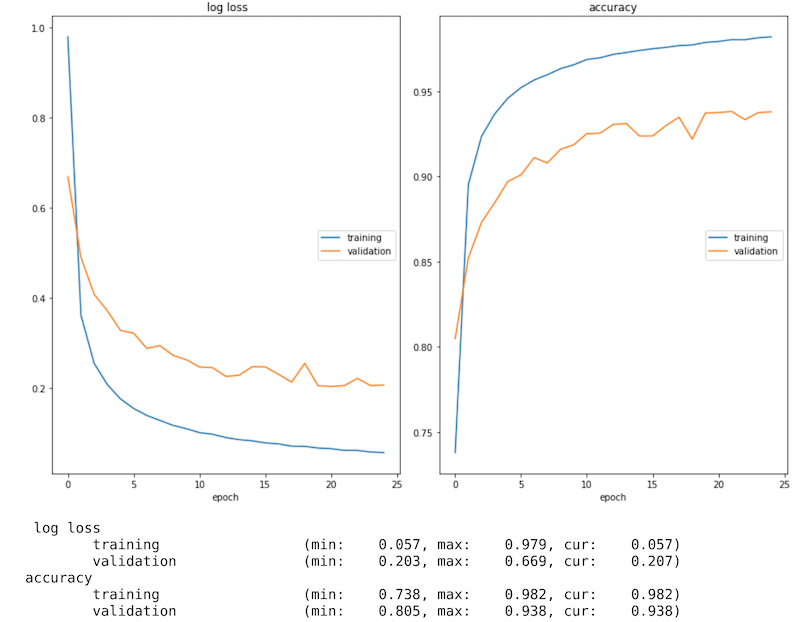

Stats of model weights:

| layer  | mean | std | min | max |
| --- | --- | --- | --- | --- |
| [32, 1, 3, 3] | 0.010636959 | 0.22899468 | -0.46163896 | 0.475876 |
| [32] | 0.996221 | 0.15724902 | 0.76454026 | 1.2786651 |
| [32] | 0.0027538259 | 0.12420908 | -0.2189539 | 0.3527733 |
| [32, 32, 3, 3] | -0.008200792 | 0.118669 | -0.5056002 | 0.4146108 |
| [32] | 1.0081792 | 0.056891315 | 0.90777814 | 1.2050303 |
| [32] | 0.026817547 | 0.10396137 | -0.26663348 | 0.20159368 |
| [64, 32, 3, 3] | -0.014333535 | 0.12256656 | -0.50615615 | 0.4533679 |
| [64] | 0.9974977 | 0.08634209 | 0.7907203 | 1.2568134 |
| [64] | 0.14962368 | 0.115132764 | -0.061325327 | 0.4502867 |
| [64, 64, 3, 3] | -0.017976705 | 0.12205418 | -0.57000226 | 0.4166646 |
| [64] | 1.0069773 | 0.059481375 | 0.86220425 | 1.1597614 |
| [64] | -0.051663052 | 0.13898876 | -0.32512048 | 0.21735935 |
| [128, 64, 12, 1] | -0.018990373 | 0.12017131 | -0.6705136 | 0.4422616 |
| [128] | 1.0002592 | 0.06692185 | 0.8781847 | 1.1816686 |
| [128] | -0.058575556 | 0.16458103 | -0.48260003 | 0.26593107 |
| [128, 128, 1, 9] | -0.0101870475 | 0.11445579 | -0.6434529 | 0.48925778 |
| [128] | 2.2143257 | 0.093243405 | 2.016831 | 2.4958444 |
| [128] | 0.009643242 | 0.15400995 | -0.32985976 | 0.34011346 |
| [25, 128, 1, 1] | -0.026930284 | 0.33412263 | -0.80488867 | 0.78658116 |
| [25] | -0.020718738 | 0.14768499 | -0.24507292 | 0.33205336 |

**Result**: 
The loss is slightly worse than using without regularization.

#### 4.2 Running with `1e-5` and `1e-4` `weight_decay`

Stats of model weights with `1e-5`

| layer  | mean | std | min | max |
| --- | --- | --- | --- | --- |
| [32, 1, 3, 3] | 0.011647317 | 0.24851279 | -0.4747914 | 0.5346484 |
| [32] | 0.9580177 | 0.15074329 | 0.6711443 | 1.2789162 |
| [32] | 0.034546353 | 0.150151 | -0.2896262 | 0.3396691 |
| [32, 32, 3, 3] | -0.011256493 | 0.1533942 | -0.62041664 | 0.5033414 |
| [32] | 0.99367446 | 0.062805 | 0.862573 | 1.1283422 |
| [32] | 0.035676774 | 0.109716624 | -0.18434727 | 0.22105841 |
| [64, 32, 3, 3] | -0.01803793 | 0.15033008 | -0.6884764 | 0.56356055 |
| [64] | 0.95889705 | 0.08644466 | 0.7762798 | 1.134316 |
| [64] | 0.1288281 | 0.12077189 | -0.11174016 | 0.41802576 |
| [64, 64, 3, 3] | -0.019332074 | 0.14623396 | -0.7195457 | 0.55242836 |
| [64] | 0.96668077 | 0.05642011 | 0.849591 | 1.1100701 |
| [64] | -0.059893284 | 0.17005852 | -0.44119623 | 0.36083132 |
| [128, 64, 12, 1] | -0.021252288 | 0.14375582 | -0.752522 | 0.5909834 |
| [128] | 0.9352312 | 0.079443224 | 0.7640156 | 1.1657395 |
| [128] | -0.04031091 | 0.1588666 | -0.6537178 | 0.30267495 |
| [128, 128, 1, 9] | -0.007516362 | 0.10253734 | -0.5038881 | 0.5183617 |
| [128] | 2.0655298 | 0.09112716 | 1.8735492 | 2.3629653 |
| [128] | 0.013346261 | 0.12468807 | -0.32896292 | 0.2566957 |
| [25, 128, 1, 1] | -0.022450062 | 0.3622112 | -0.85085243 | 0.9062303 |
| [25] | -0.019957663 | 0.15528311 | -0.19307797 | 0.358867 |


Stats of model weights with `1e-4`

| layer  | mean | std | min | max |
| --- | --- | --- | --- | --- |
| [32, 1, 3, 3] | 0.0086631505 | 0.20326015 | -0.39575285 | 0.41409338 |
| [32] | 0.84307194 | 0.110642456 | 0.597441 | 0.994459 |
| [32] | 0.011043194 | 0.090127975 | -0.14006919 | 0.24824932 |
| [32, 32, 3, 3] | -0.005994698 | 0.09066486 | -0.34339687 | 0.3084633 |
| [32] | 0.92169344 | 0.052376267 | 0.83507276 | 1.0546027 |
| [32] | 0.029229328 | 0.08991733 | -0.13085787 | 0.21744016 |
| [64, 32, 3, 3] | -0.009557366 | 0.084825955 | -0.36473325 | 0.34850013 |
| [64] | 0.8162667 | 0.060894128 | 0.670338 | 0.9677987 |
| [64] | 0.11682289 | 0.09684617 | -0.122684635 | 0.3154468 |
| [64, 64, 3, 3] | -0.010496861 | 0.078878775 | -0.34600934 | 0.27449137 |
| [64] | 0.836374 | 0.050591957 | 0.69948155 | 0.94377303 |
| [64] | -0.035686206 | 0.12368891 | -0.40466824 | 0.18831608 |
| [128, 64, 12, 1] | -0.011824579 | 0.07844714 | -0.37428686 | 0.32772198 |
| [128] | 0.7457975 | 0.069420375 | 0.4777333 | 0.9506231 |
| [128] | -0.075422846 | 0.1677922 | -0.58319837 | 0.30993077 |
| [128, 128, 1, 9] | -0.0036104051 | 0.046361502 | -0.23309894 | 0.23276146 |
| [128] | 1.5697943 | 0.056143116 | 1.454963 | 1.7378296 |
| [128] | -0.00022698776 | 0.095874734 | -0.2240725 | 0.20398895 |
| [25, 128, 1, 1] | -0.013080668 | 0.29308993 | -0.69799864 | 0.68770003 |
| [25] | 0.002056005 | 0.08843686 | -0.12380545 | 0.24057794 |


losses `1e-5` and `1e-4` respectively
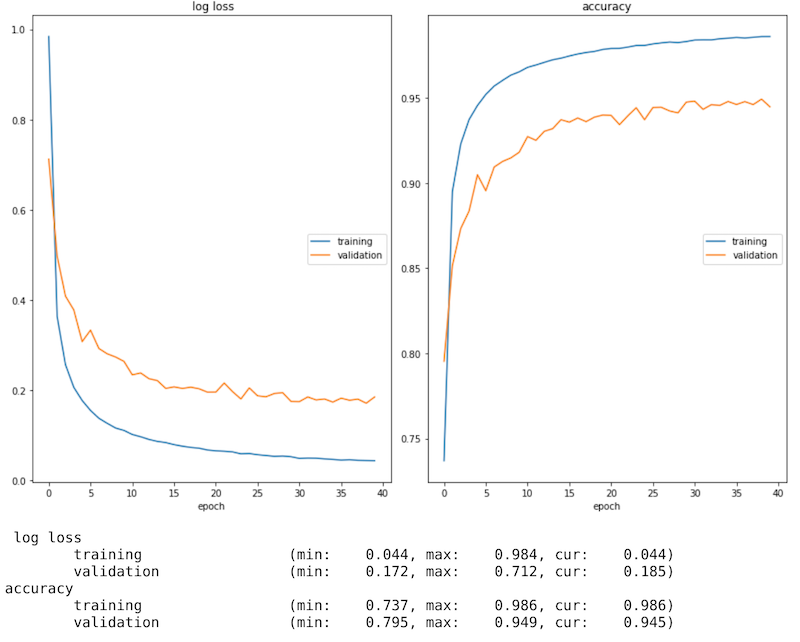


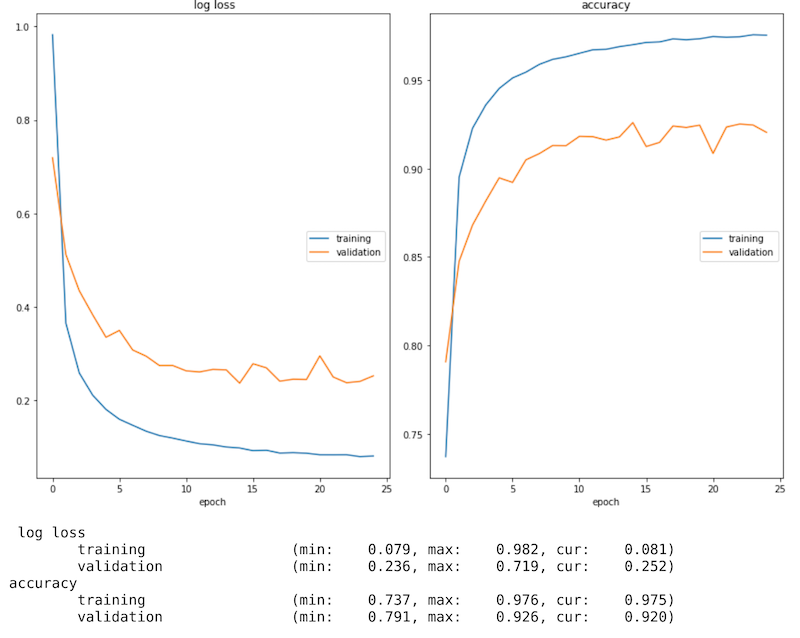

The final linear layer accross models with different L2 regularization factors (lambdas).

| reg  | mean | std | min | max |
| --- | --- | --- | --- | --- |
| w/o | 2.234578 | 0.098231144 | 2.0039344 | 2.5515196 |
| 1e-7 | 2.2143257 | 0.093243405 | 2.016831 | 2.4958444 |
| 1e-5 | 2.0655298 | 0.09112716 | 1.8735492 | 2.3629653 |
| 1e-4 | 1.5697943 | 0.056143116 | 1.454963 | 1.7378296 |

**Result**:
The closest ones weights to the original model w/o reg is the model with `1e-7` lambda. However it performs slightly worse. The model with `1e-5` lambda has lower loss than the model w/o and `1e-7` reg, but `1e-4` overpenalize model, so the loss is higher than other ones. Considering mentioned table we could say that reducing final linear layer's weights does not affect on model loss significantly.